In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

X_train = pd.read_csv('/content/drive/MyDrive/Image classification dataset/input.csv')
Y_train = pd.read_csv('/content/drive/MyDrive/Image classification dataset/labels.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Image classification dataset/input_test.csv')
Y_test = pd.read_csv('/content/drive/MyDrive/Image classification dataset/labels_test.csv')

# Convert DataFrames to NumPy arrays before reshaping
X_train = X_train.to_numpy().reshape(len(X_train), 100, 100, 3)
X_test = X_test.to_numpy().reshape(len(X_test), 100, 100, 3)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (1999, 100, 100, 3)
Y_train shape: (1999, 1)
X_test shape: (399, 100, 100, 3)
Y_test shape: (399, 1)


In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

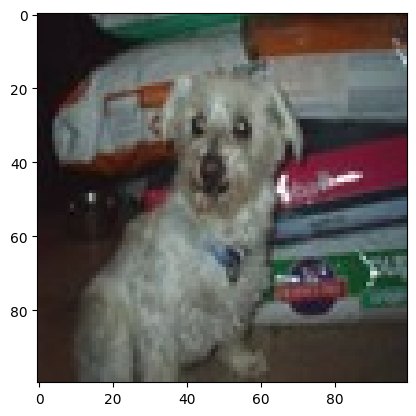

In [9]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 29s 856ms/step - loss: 0.7274 - accuracy: 0.5223
Epoch 2/5
32/32 [==============================] - 21s 650ms/step - loss: 0.6758 - accuracy: 0.5933
Epoch 3/5
32/32 [==============================] - 22s 699ms/step - loss: 0.6358 - accuracy: 0.6463
Epoch 4/5
32/32 [==============================] - 21s 658ms/step - loss: 0.5621 - accuracy: 0.7159
Epoch 5/5
32/32 [==============================] - 21s 650ms/step - loss: 0.5259 - accuracy: 0.7444


In [14]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 2s 142ms/step - loss: 0.5812 - accuracy: 0.6742


[0.581151008605957, 0.6741854548454285]

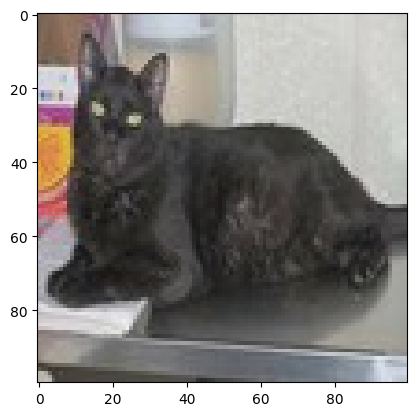

1/1 [==============================] - 0s 30ms/step
Our model says it is a : cat


In [21]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)